In [1]:
import pickle

In [2]:
with open('knn.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
model.predict([[36,178917,9,2]])

C:\Users\s_nas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [12]:
import pandas as pd
df = pd.read_csv('f.csv')

In [13]:
import matplotlib.pyplot as plt

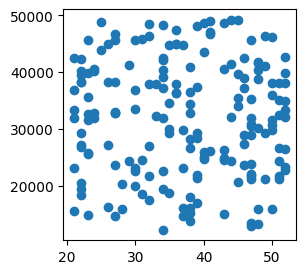

In [14]:
plt.figure(figsize=(3,3))
plt.scatter(df['age'], df['salary'])

In [15]:
from sklearn.cluster import KMeans

In [16]:
model = KMeans(n_clusters=4)

In [19]:
pred = model.fit_predict(df[['age', 'salary']])

In [20]:
df['status'] = pred

In [21]:
df

,age,salary,status
0,30,36942,1
1,27,38311,1
2,22,20465,2
3,22,29369,0
4,38,32888,1
...,...,...,...
178,23,14936,2
179,49,29234,0
180,22,38367,1
181,41,26135,0


In [22]:
model.cluster_centers_

array([[3.88043478e+01, 2.64839565e+04],
       [3.63103448e+01, 3.59727414e+04],
       [3.71052632e+01, 1.77738421e+04],
       [3.66097561e+01, 4.51217073e+04]])

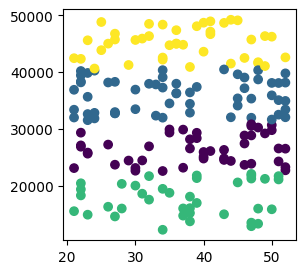

In [29]:
plt.figure(figsize=(3,3))
plt.scatter(df['age'], df['salary'], c=df['status'])

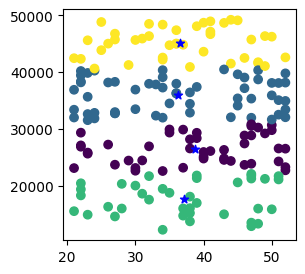

In [46]:
plt.figure(figsize=(3,3))
plt.scatter(df['age'], df['salary'], c=df['status'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color= 'b', marker = '*')

In [30]:
model.cluster_centers_

array([[3.88043478e+01, 2.64839565e+04],
       [3.63103448e+01, 3.59727414e+04],
       [3.71052632e+01, 1.77738421e+04],
       [3.66097561e+01, 4.51217073e+04]])

In [32]:
model.cluster_centers_.shape

(4, 2)

In [42]:
model.cluster_centers_[:,0]

array([38.80434783, 36.31034483, 37.10526316, 36.6097561 ])

In [34]:
model.cluster_centers_[1]

array([   36.31034483, 35972.74137931])

In [39]:
list = ['a', 'b','c','d','e','f']
list[2:]

['c', 'd', 'e', 'f']

In [47]:
df.shape

(183, 3)

In [48]:
183*3

549

In [49]:
#PCA

In [76]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [77]:
df.shape

(1025, 14)

In [79]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [54]:
df.drop('target', axis='columns', inplace = True)

In [55]:
from sklearn.decomposition import PCA

In [80]:
model = PCA(0.5)

In [81]:
pred = model.fit_transform(df)

In [82]:
pred.shape

(1025, 1)

In [84]:
from sklearn.model_selection import train_test_split


In [85]:
x = df.drop('target', axis='columns')
y = df['target']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [88]:
model.fit(x_train, y_train)

C:\Users\s_nas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
model.score(x_test, y_test)

0.8715953307392996

In [92]:
model.predict([[1]])

C:\Users\s_nas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 13 features as input.

In [93]:
pca = PCA(0.8)

In [94]:
x_pca = pca.fit_transform(x)

In [95]:
x_pca.shape

(1025, 2)

In [113]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y)

In [114]:
model_pca = LogisticRegression()
model_pca.fit(x_train_pca, y_train_pca)

LogisticRegression()

In [115]:
model_pca.score(x_test_pca, y_test_pca)

0.7042801556420234

In [117]:
model_pca.predict([[1,1]])

array([1])